<a href="https://colab.research.google.com/github/joybd97/hand-written-digit-recognization/blob/main/Handwritten_digit_recognition_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/temp/numbers.zip

**Importing libarys**

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import tensorflow as tf
import pathlib
import PIL

In [ ]:
path='/content/number'
images=[]
classNo=[]
testRatio=0.2
valRatio=0.2
imgDimension=(32,32,3)
myList=os.listdir(path)

numOfClasses=len(myList)

print("Importing Classes..........")
for x in range(0, numOfClasses):
	myPicList=os.listdir(path+"/"+str(x))
	for y in myPicList:
		curImg=cv2.imread(path+"/"+str(x)+"/"+y)
		curImg=cv2.resize(curImg,(imgDimension[0],imgDimension[1]))
		images.append(curImg)
		classNo.append(x)
	print(x)
print(curImg.shape)
images=np.array(images)
classNo=np.array(classNo)
print(len(images))

Importing Classes..........
0
1
2
3
4
5
6
7
8
9
(32, 32, 3)
19748


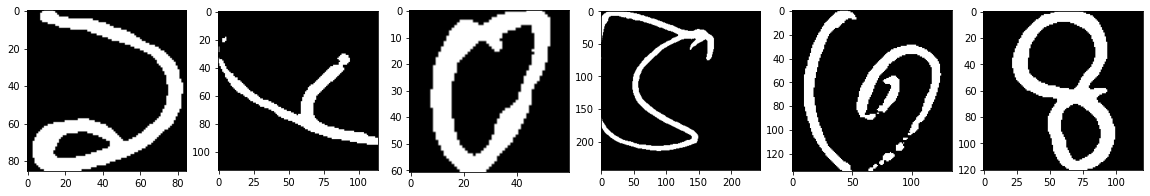

In [ ]:
data_dir = pathlib.Path(path)
imgdirs=list(data_dir.iterdir())
w = 20
h = 20
fig = plt.figure(figsize=(20, 20))
columns = 6
rows = len(imgdirs)//columns
for i in range(1, columns*rows +1):
    imgdir = imgdirs.pop(0) # pop first elemetn of the list 
    img=PIL.Image.open(next(imgdir.glob('*.png')))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(images, classNo, test_size=0.2)
x_train, x_validation, y_train, y_validation=train_test_split(x_train, y_train, test_size=valRatio)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(12638, 32, 32, 3)
(12638,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(3950, 32, 32, 3)
(3950,)


In [ ]:
print(x_validation.shape)
print(y_validation.shape)

(3160, 32, 32, 3)
(3160,)


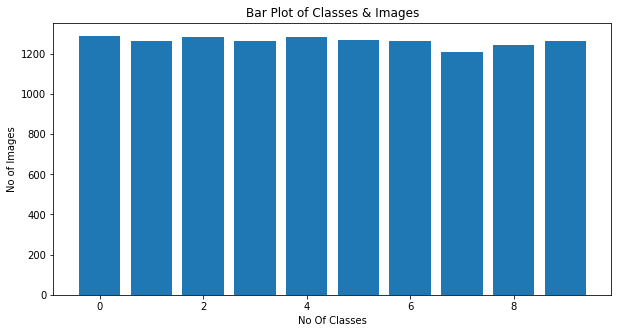

In [ ]:
numOfSample=[]

for x in range(0,numOfClasses):
	numOfSample.append(len(np.where(y_train==x)[0]))


plt.figure(figsize=(10,5))
plt.bar(range(0, numOfClasses),numOfSample)
plt.title("Bar Plot of Classes & Images")
plt.xlabel("No Of Classes")
plt.ylabel("No of Images")
plt.show()

In [ ]:
def preprocessing(img):
	# img=np.astype("uint8")
	img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	_, img = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)
	img=cv2.equalizeHist(img)
	img=img/255
  
	return img


In [ ]:


x_train=np.array(list(map(preprocessing, x_train)))
x_test=np.array(list(map(preprocessing, x_test)))
x_validation=np.array(list(map(preprocessing, x_validation)))

In [ ]:
x_train.shape

(12638, 32, 32)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_models=[]
knn_acc=[]
for i in range(1,16):
  knn = KNeighborsClassifier(n_neighbors=i)
  nsamples, nx, ny = x_train.shape
  d2_train_dataset = x_train.reshape((nsamples,nx*ny))

  knn.fit(d2_train_dataset,y_train)
  # knn.predict(x_test[0].reshape(1,-1))
  nsamples, nx, ny = x_test.shape
  d2_x_test_dataset = x_test.reshape((nsamples,nx*ny))

  pred=knn.predict(d2_x_test_dataset)
  acc=metrics.accuracy_score(y_test,pred)
  print('KNN Accuracy for k={%d} : %.3f' % (i,acc))
  knn_models.append(knn)
  knn_acc.append(acc)

KNN Accuracy for k={1} : 0.829
KNN Accuracy for k={2} : 0.801
KNN Accuracy for k={3} : 0.821
KNN Accuracy for k={4} : 0.821
KNN Accuracy for k={5} : 0.828
KNN Accuracy for k={6} : 0.823
KNN Accuracy for k={7} : 0.824
KNN Accuracy for k={8} : 0.822
KNN Accuracy for k={9} : 0.819
KNN Accuracy for k={10} : 0.824
KNN Accuracy for k={11} : 0.819
KNN Accuracy for k={12} : 0.821
KNN Accuracy for k={13} : 0.819
KNN Accuracy for k={14} : 0.820
KNN Accuracy for k={15} : 0.819


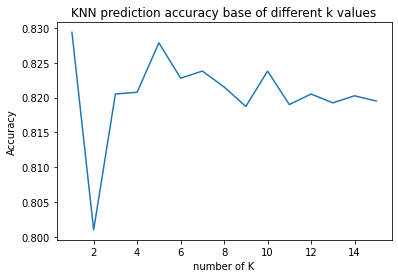

In [ ]:
plt.plot(range(1,16),knn_acc)
plt.ylabel('Accuracy')
plt.xlabel('number of K')
plt.title('KNN prediction accuracy base of different k values')
plt.show()

In [ ]:

max_acc_idx=np.argmax(knn_acc)
print("best model acc ,",round(knn_acc[max_acc_idx],2)*100)

knn_best_model=knn_models[max_acc_idx] 


best model acc , 83.0


In [ ]:
nsamples, nx, ny = x_test.shape
d2_x_test_dataset = x_test.reshape((nsamples,nx*ny))

pred=knn_best_model.predict(d2_x_test_dataset)

Text(0.5, 1.0, 'Accuracy Score: 0.83')

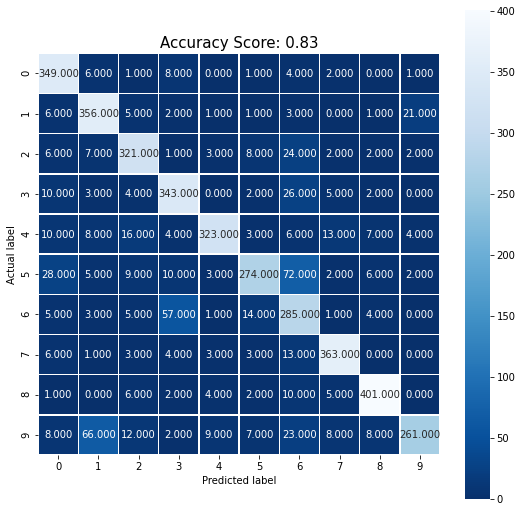

In [ ]:
# to create nice confusion metrics
cm = metrics.confusion_matrix(y_test,pred)
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(knn_acc[max_acc_idx],2))
plt.title(all_sample_title,size=15)

In [ ]:
# save to file
from joblib import dump

dump(knn_best_model, '/content/drive/MyDrive/knn_model.joblib') 



['/content/drive/MyDrive/knn_model.joblib']

DecisionTreeClassifier Accuracy: 0.667


Text(0.5, 1.0, 'Accuracy Score: 0.829')

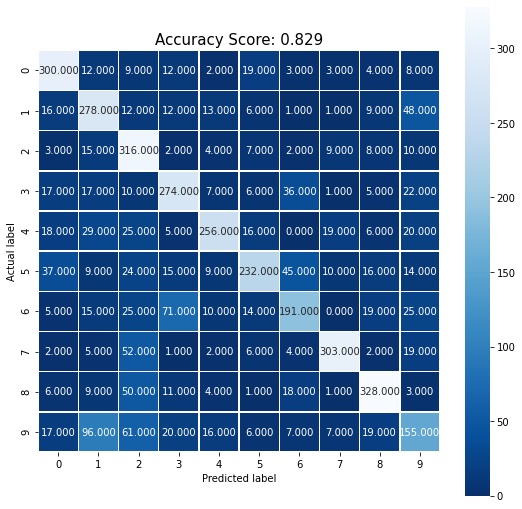

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy",max_depth=8)
nsamples, nx, ny = x_train.shape
d2_train_dataset = x_train.reshape((nsamples,nx*ny))
clf = clf.fit(d2_train_dataset,y_train)

nsamples, nx, ny = x_test.shape
d2_x_test_dataset = x_test.reshape((nsamples,nx*ny))

y_pred = clf.predict(d2_x_test_dataset)
acc_score=metrics.accuracy_score(y_test,y_pred)
print('DecisionTreeClassifier Accuracy: %.3f' % acc_score)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cnf_matrix,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(0.829)
plt.title(all_sample_title,size=15)

In [ ]:


dump(clf, '/content/drive/MyDrive/dtree_model.joblib') 


['/content/drive/MyDrive/dtree_model.joblib']

In [ ]:
# plt.imshow(x_train[0],cmap="gray")

In [ ]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
x_validation=x_validation.reshape(x_validation.shape[0], x_validation.shape[1], x_validation.shape[2],1)


dataGen=ImageDataGenerator(
	width_shift_range=0.1,
	height_shift_range=0.1,
	zoom_range=0.2,
	shear_range=0.1,
	rotation_range=10,

  )

dataGen.fit(x_train)

y_train=to_categorical(y_train, numOfClasses)
y_test=to_categorical(y_test, numOfClasses)
y_validation=to_categorical(y_validation, numOfClasses)

In [ ]:
x_train.shape

(12638, 32, 32, 1)

In [ ]:
def myModel(numOfClasses):
  noOfFilters=80
  sizeOfFilter1=(5,5)
  sizeOfFilter2=(3,3)
  sizeOfPool=(2,2)
  noOfNode=114


  model=Sequential()
  model.add((Conv2D(noOfFilters, sizeOfFilter1,padding="same", input_shape=(imgDimension[0],imgDimension[1],1),activation='relu')))
  model.add((Conv2D(noOfFilters, sizeOfFilter1,activation='relu',padding='same')))
  model.add(MaxPooling2D(pool_size=sizeOfPool))

  model.add((Conv2D(noOfFilters//2, sizeOfFilter2,activation='relu')))
  model.add((Conv2D(noOfFilters//2, sizeOfFilter2,activation='relu')))
  model.add(MaxPooling2D(pool_size=sizeOfPool))
  model.add(Dropout(0.2))

  model.add((Conv2D(noOfFilters//4, sizeOfFilter2,activation='relu',padding='same')))
  model.add((Conv2D(noOfFilters//4, sizeOfFilter2,activation='relu',padding='same')))
  model.add(MaxPooling2D(pool_size=sizeOfPool))
  model.add(Dropout(0.1))


  model.add(Flatten())
  model.add(Dense(noOfNode, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(numOfClasses, activation='softmax'))
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

model=myModel(numOfClasses)
print(model.summary())

history=model.fit_generator(dataGen.flow(x_train, y_train,batch_size=50),
	epochs=10,
	validation_data=(x_validation,y_validation),
	shuffle=1)

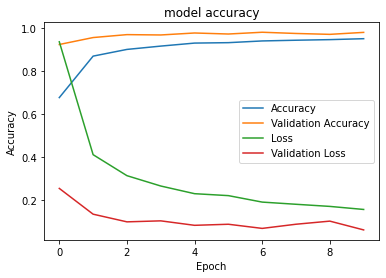

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/BanglaModel1.h5")

In [ ]:
prediction=model.predict(x_test)
                        # y_test


# [6]=> [ 0.1 0.1 0 0 0 0.8 0 0 0 0]

In [ ]:
y_pred=np.round(prediction)
ypred_class=[]
ytest_class=[]
for pred in y_pred:
  ypred_class.append(np.argmax(pred))

for cls in y_test:
  ytest_class.append(np.argmax(cls))

0.9643037974683545


Text(0.5, 1.0, 'Accuracy Score: 0.964')

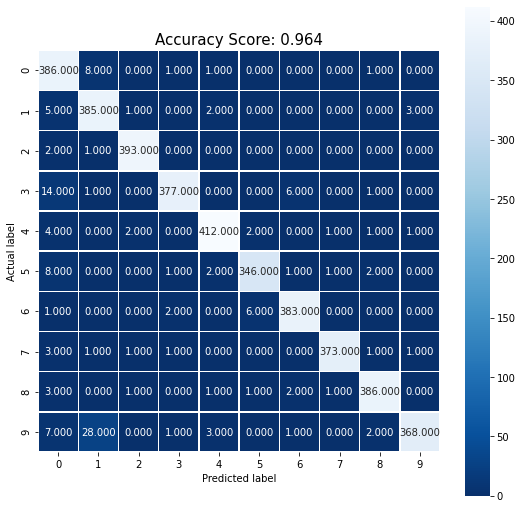

In [ ]:


acc_scr=metrics.accuracy_score(y_true=ytest_class,y_pred=ypred_class)
print(acc_scr)

cnf_matrix = metrics.confusion_matrix(ytest_class, ypred_class)
cnf_matrix


import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cnf_matrix,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(acc_scr,3))
plt.title(all_sample_title,size=15)

**LOADING SAVED MODEL**

In [ ]:
model= tf.keras.models.load_model('/content/drive/MyDrive/BanglaModel1.h5')
print(model.input_shape)


# # load from file
from joblib import load

dtree = load('/content/drive/MyDrive/dtree_model.joblib')
knn = load('/content/drive/MyDrive/knn_model.joblib')

(None, 32, 32, 1)


In [ ]:
EtoB_digit={
    0:'0',
    1:'১',
    2:'২',
    3:'৩',
    4:'৪',
    5:'৫',
    6:'৬',
    7:'৭',
    8:'৮',
    9:'৯',
    }

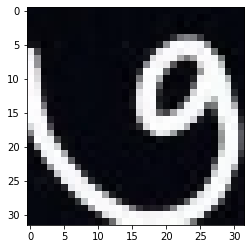

cnn pridict,	 ৩
knn predict,	 ৩
Dtree predict,	 ৯


In [ ]:
image_path="/content/3.jpg"



img=cv2.imread(image_path)
img=cv2.resize(img, (32,32))
plt.imshow(img,cmap='gray') 
plt.show()
base_img=preprocessing(img)

# 
img=base_img.reshape(1, 32, 32, 1)

classIndex=model.predict(img)
result=np.argmax(classIndex)

print("cnn pridict,\t",EtoB_digit[result])

# preprocessing 
img=np.expand_dims(base_img,axis=0)
sample,w,h=img.shape
img=img.reshape((sample,w*h))
# predict 
pred=knn.predict(img)


print("knn predict,\t",EtoB_digit[pred[0]])


pred=dtree.predict(img)


print("Dtree predict,\t",EtoB_digit[pred[0]])